$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 1 $$

# `01` Assignment 01
- Design your own simple ANN,(one perceptron with one input layer
and one output neuron)
- Use the data points listed in the adjacent Table as your training data.
- Assume the activation function is sigmoid.
- Assume there is no bias for simplicity (b=0).
- Test your design using different iteration numbers.


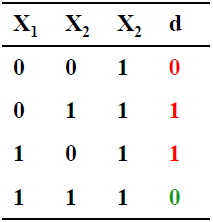

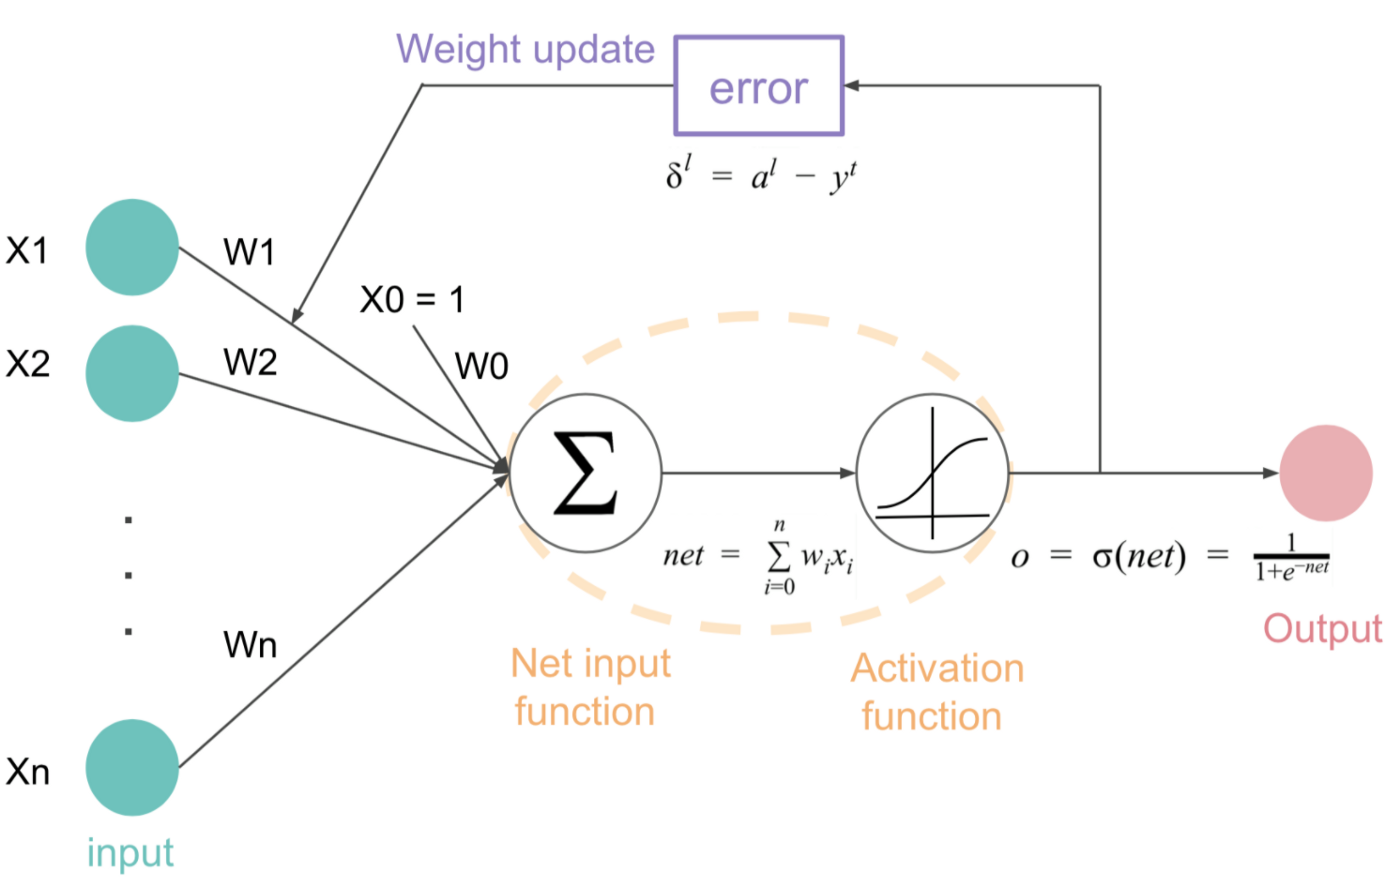

## `i` Implementation

In [6]:
import numpy as np
np.random.seed = 42

In [7]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')
print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [8]:
class ANN:
    def __init__(self, X, y):
        self.X = X
        self.y = y

        self.weights = np.random.rand(X.shape[1], 1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):
        self.z = np.dot(self.X,self.weights)
        self.a = self.sigmoid(self.z)
        return self.a

    def backprop(self):
        error = self.a - self.y    # Difference between predicted and actual values
        d_weights = np.dot(self.X.T, error * self.sigmoid_derivative(self.a))  # Gradient for weights

        # Update weights 
        self.weights -= 0.1 * d_weights  # Learning rate = 0.1


    def fit(self, iterations=1000, verbose=1):
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose and i % 100 == 0:
                loss = np.mean(np.abs(self.y - self.a))  # Mean Absolute Error (MAE)
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def predict(self, X_new):
        return self.sigmoid(np.dot(X_new, self.weights))
        

## `ii` Testing

In [13]:
model = ANN(X, y)
# if we made the verbose = 0 ,, it will be a silent training 
model.fit(iterations=1000,verbose=1)


Iteration 0: Loss = 0.4962
Iteration 100: Loss = 0.3372
Iteration 200: Loss = 0.2430
Iteration 300: Loss = 0.1932
Iteration 400: Loss = 0.1629
Iteration 500: Loss = 0.1424
Iteration 600: Loss = 0.1276
Iteration 700: Loss = 0.1163
Iteration 800: Loss = 0.1074
Iteration 900: Loss = 0.1001


In [14]:
predictions = model.predict(X)
print("Predictions:\n", np.round(predictions))  # Round values to 0 or 1

Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


----

# `02` Assignment 02
- Modify the above designed code to implement a `multi layer perceptron`, `MLP` (an ANN with one input layer, one hidden layer and one output layer) for the same data points above
- Assume `sigmoid` activation function and there is `no bias` for simplicity (b=0)
- Test your approach using `different iteration numbers` and `different number of nodes` for the hidden layer (e.g. 4, 8 and 16)

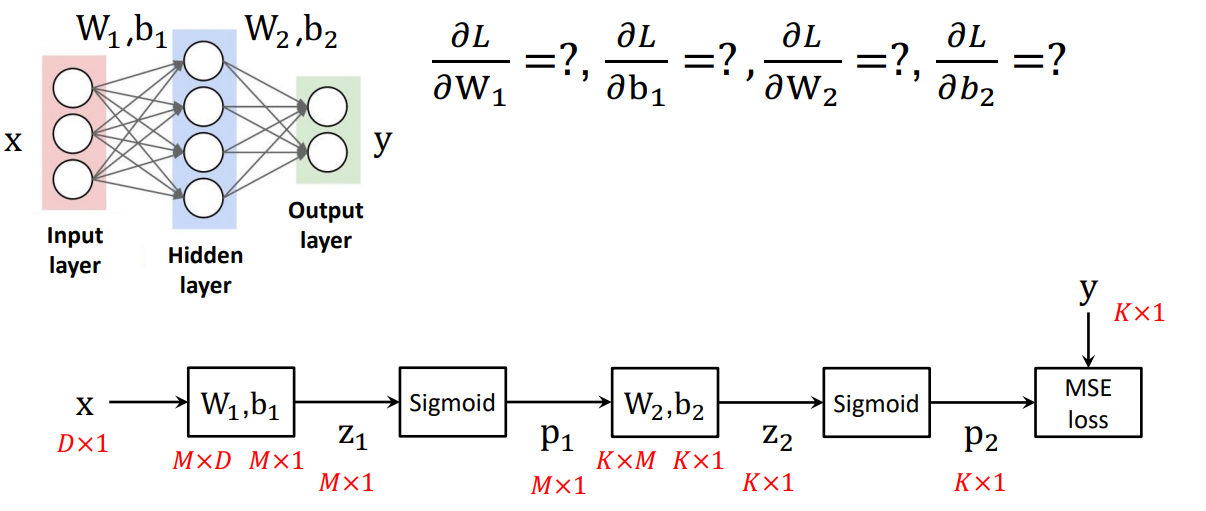

## `i` Implementation

In [19]:
import numpy as np

class ANN:
    def __init__(self, X, y, hidden_neurons=4):
        self.X = X
        self.y = y
        self.hidden_neurons = hidden_neurons

        self.w1 = np.random.rand(X.shape[1], hidden_neurons)  
        self.w2 = np.random.rand(hidden_neurons, 1)  

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, p):
        return p * (1 - p)

    def feedforward(self):
        self.z1 = np.dot(self.X, self.w1)
        self.a1 = self.sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.w2)
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def backprop(self):
        error_output = self.a2 - self.y
        d_w2 = np.dot(self.a1.T, error_output * self.sigmoid_derivative(self.a2))  

        error_hidden = np.dot(error_output, self.w2.T)
        d_w1 = np.dot(self.X.T, error_hidden * self.sigmoid_derivative(self.a1)) 

        
        self.w1 -= 0.1 * d_w1
        self.w2 -= 0.1 * d_w2

    def fit(self, iterations=1000, verbose=1):
        for i in range(iterations):
            self.feedforward()
            self.backprop()
            if verbose and i % 100 == 0:
                loss = np.mean(np.abs(self.y - self.a2))  # Mean Absolute Error (MAE)
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def predict(self, X_new):
        Z1 = np.dot(X_new, self.w1)
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(A1, self.w2)
        A2 = self.sigmoid(Z2)
        return A2


## `ii` Testing

In [ ]:
X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
], dtype=float)


y = np.array([
    [0],
    [1],
    [1],
    [0],
], dtype=float)


print('X:\n', X, '\n')

print('y:\n', y)

X:
 [[0. 0. 1.]
 [1. 1. 1.]
 [1. 0. 1.]
 [0. 1. 1.]] 

y:
 [[0.]
 [1.]
 [1.]
 [0.]]


<B>Testing the model with a different numbers of hidden neurons</B>

In [22]:
model = ANN(X, y,hidden_neurons=4)
# if we made the verbose = 0 ,, it will be a silent training 
model.fit(iterations=1000,verbose=1)

predictions = model.predict(X)
print("Predictions:\n", np.round(predictions))  # Round values to 0 or 1

Iteration 0: Loss = 0.4909
Iteration 100: Loss = 0.4918
Iteration 200: Loss = 0.4536
Iteration 300: Loss = 0.3164
Iteration 400: Loss = 0.1905
Iteration 500: Loss = 0.1300
Iteration 600: Loss = 0.0995
Iteration 700: Loss = 0.0816
Iteration 800: Loss = 0.0700
Iteration 900: Loss = 0.0618
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [23]:
model = ANN(X, y,hidden_neurons=8)
# if we made the verbose = 0 ,, it will be a silent training 
model.fit(iterations=1000,verbose=1)

predictions = model.predict(X)
print("Predictions:\n", np.round(predictions))  # Round values to 0 or 1

Iteration 0: Loss = 0.4871
Iteration 100: Loss = 0.4538
Iteration 200: Loss = 0.3245
Iteration 300: Loss = 0.1900
Iteration 400: Loss = 0.1248
Iteration 500: Loss = 0.0924
Iteration 600: Loss = 0.0738
Iteration 700: Loss = 0.0617
Iteration 800: Loss = 0.0534
Iteration 900: Loss = 0.0472
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


In [24]:
model = ANN(X, y,hidden_neurons=32)
# if we made the verbose = 0 ,, it will be a silent training 
model.fit(iterations=1000,verbose=1)

predictions = model.predict(X)
print("Predictions:\n", np.round(predictions))  # Round values to 0 or 1

Iteration 0: Loss = 0.5000
Iteration 100: Loss = 0.4378
Iteration 200: Loss = 0.2588
Iteration 300: Loss = 0.1223
Iteration 400: Loss = 0.0772
Iteration 500: Loss = 0.0572
Iteration 600: Loss = 0.0459
Iteration 700: Loss = 0.0386
Iteration 800: Loss = 0.0334
Iteration 900: Loss = 0.0296
Predictions:
 [[0.]
 [1.]
 [1.]
 [0.]]


---

# `03` Assignment 03
- Use the `Keras` library tensorflow keras to build different ANNs using different numbers of hidden layers:
  - `shallow`  : 1 hidden, output layer
  - `deeper`   : two hidden layers with 12 and 8 nodes respectively
  - `more deep`: three hidden layers with 32 16 8 nodes respectively

Use the diabetic dataset provided [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to train and test your design Use the `ReLU` activation for the hidden layers and the `sigmoid` activation for the output neuron,
- `loss='binary_crossentropy'`
- `optimizer='adam'`
- `metrics=['accuracy’]`
- `epochs=150`

## `0` Import Libraries & Load Dataset

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
np.random.seed = 42

In [40]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
X =df.drop('Outcome',axis=1)
y =df["Outcome"]

In [42]:
X.shape

(768, 8)

In [43]:
y.shape

(768,)

## `i` Shallow network


In [53]:
#  make a shallow network
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(8,)))
model.add(Dense(1, activation='sigmoid'))

model.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_6 (Dense)             (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
X.shape

(768, 8)

In [55]:
768/32

24.0

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
h = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150


24/24 [==============================] - 1s 2ms/step - loss: 3.3124 - accuracy: 0.6471
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 2.2235 - accuracy: 0.5964
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 1.8209 - accuracy: 0.6250
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 1.5030 - accuracy: 0.6328
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1.3125 - accuracy: 0.6263
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1937 - accuracy: 0.6237
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0999 - accuracy: 0.6146
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0420 - accuracy: 0.6120
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9900 - accuracy: 0.6133
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9398 - accuracy: 0.6185
Epoch 11/150
24/24 [=

In [58]:
h.history.keys()  

dict_keys(['loss', 'accuracy'])

In [59]:
h.history['loss'][-1]

0.5686991810798645

In [60]:
h.history['accuracy'][-1]

0.7278645634651184

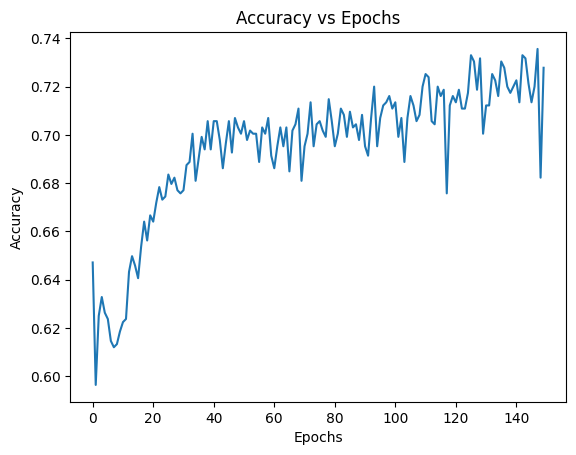

In [61]:
plt.plot(h.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show() 

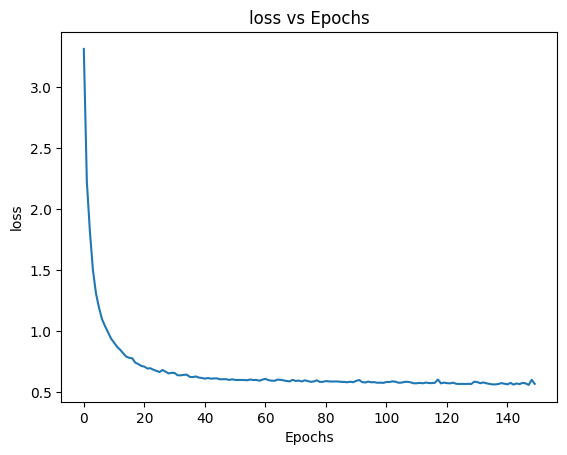

In [63]:
plt.plot(h.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("loss vs Epochs")
plt.show() 

## `ii` Deep network


In [71]:
# make a deep network
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 12)                108       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
h = model.fit(X, y, epochs=150, batch_size=32)

Epoch 1/150


24/24 [==============================] - 1s 2ms/step - loss: 9.2448 - accuracy: 0.6341
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 4.4775 - accuracy: 0.5742
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 1.9502 - accuracy: 0.4766
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 1.5948 - accuracy: 0.5677
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 1.4728 - accuracy: 0.5794
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 1.2919 - accuracy: 0.5898
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 1.2055 - accuracy: 0.5859
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1529 - accuracy: 0.6133
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1028 - accuracy: 0.6133
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 1.0572 - accuracy: 0.6146
Epoch 11/150
24/24 [=

In [74]:
h.history['accuracy'][-1]

0.7552083134651184

In [75]:
h.history['loss'][-1]

0.49216851592063904

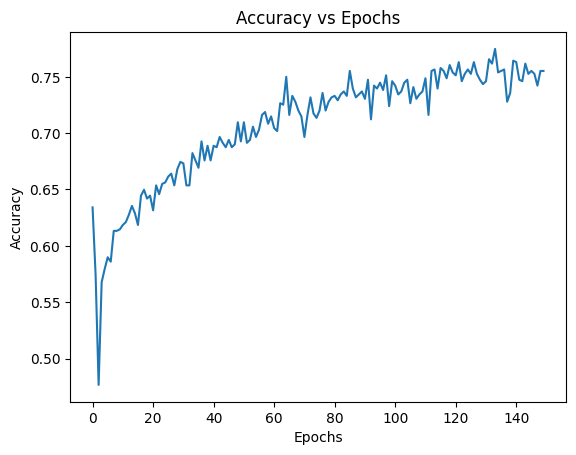

In [76]:
plt.plot(h.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

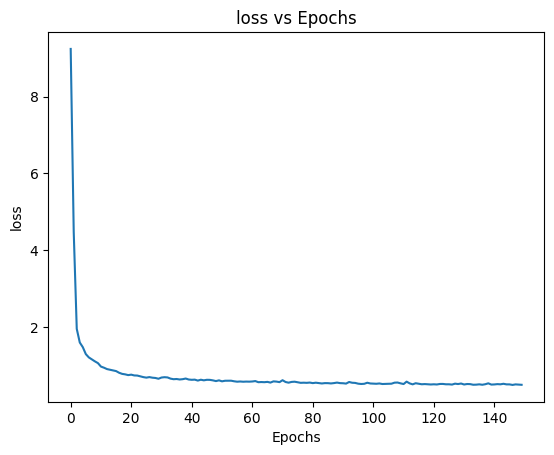

In [77]:
plt.plot(h.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("loss vs Epochs")
plt.show()

## `iii` Deeper network


In [92]:
# build a deeper network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                288       
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [94]:
h = model.fit(X, y, epochs=150, batch_size=32)  

Epoch 1/150


24/24 [==============================] - 1s 2ms/step - loss: 3.0253 - accuracy: 0.5469
Epoch 2/150
24/24 [==============================] - 0s 2ms/step - loss: 1.1430 - accuracy: 0.6172
Epoch 3/150
24/24 [==============================] - 0s 2ms/step - loss: 0.9405 - accuracy: 0.6654
Epoch 4/150
24/24 [==============================] - 0s 2ms/step - loss: 0.8208 - accuracy: 0.6615
Epoch 5/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7945 - accuracy: 0.6771
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.8016 - accuracy: 0.6849
Epoch 7/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7681 - accuracy: 0.6888
Epoch 8/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7468 - accuracy: 0.6888
Epoch 9/150
24/24 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.7109
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.8254 - accuracy: 0.6797
Epoch 11/150
24/24 [=

In [102]:
h.history['accuracy'][-1]

0.7799479365348816

In [96]:
h.history['loss'][-1]

0.4772043526172638

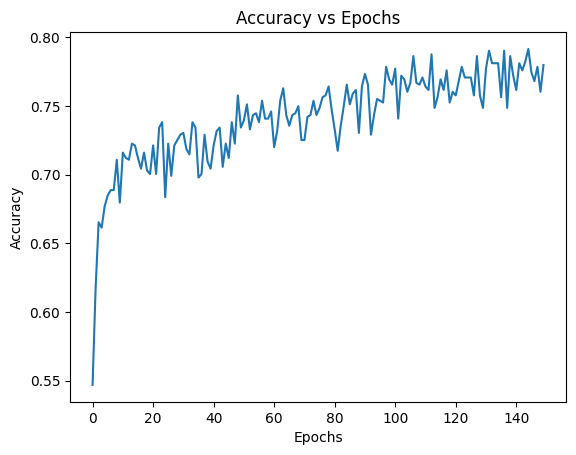

In [97]:
plt.plot(h.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.show()

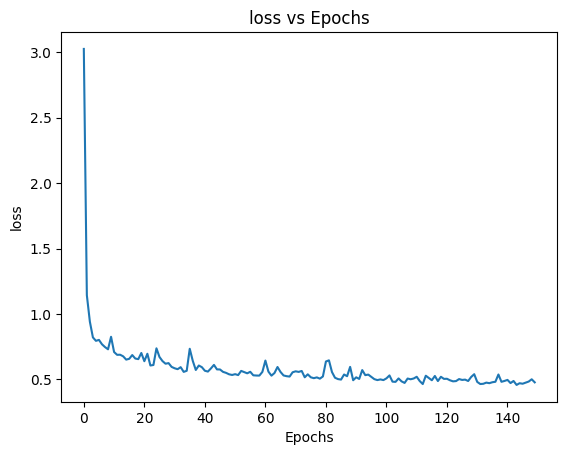

In [98]:
plt.plot(h.history['loss'])
plt.xlabel("Epochs")        
plt.ylabel("loss")  
plt.title("loss vs Epochs")
plt.show()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$